# Transfer Learning

For computational reasons, it is recommended to do this challenge on [google colab](https://colab.research.google.com/), with setting the GPU on (see `Edit` -> `Notebook settings` -> `Hardware Accelerator` -> `GPU`)

In this exercise, we will work again on the CIFAR-10 dataset, but this time you will use a well known architecture: the VGG-16.

**Q1.** First, load the data using `tensorflow.keras.datasets.cifar10` :

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# TODO: Load the CIFAR dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


**Q2.** You can have a look at some images and labels if needed, even if you already know them.

In [3]:
# TODO: Explore the data, display some input images
X_train.shape

(50000, 32, 32, 3)

In [4]:
map_labels = {
    0: 'airplane',
    1: 'automobile', 
    2: 'bird', 
    3: 'cat', 
    4: 'deer', 
    5: 'dog',
    6: 'frog', 
    7: 'horse', 
    8: 'ship',
    9: 'truck'
}

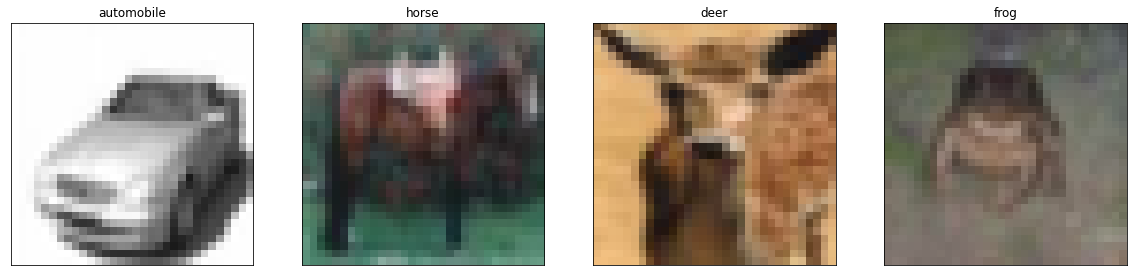

In [12]:
size = 4
sample_graph = np.random.randint(0,50000, size)

sample_images = X_train[sample_graph]
sample_labels = y_train[sample_graph]

plt.figure(figsize = (20,10))

ax =[]

for i in range(1,size+1):
    ax.append(plt.subplot(size // 4 + 1,4,i))
    plt.imshow(sample_images[i-1])
    ax[i-1].title.set_text(map_labels[sample_labels[i-1][0]])
    ax[i-1].set_xticks([])
    ax[i-1].set_yticks([])

plt.show()

**Q3.** Take care of the data preparation and preprocessing: scale the data, transform the labels into the correct shape.

In [13]:
# TODO: Make the data preparation
X_train = X_train/255
X_test = X_test/255
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

**Q4.** Now we will try to build a VGG model, and train it from scratch to see the performances we reach.

For complexity reasons, the VGG model has to be simplified for such a dataset, so we will only keep the first layers :

In [54]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.regularizers import l2

# create the base model
base_model = VGG16(weights=None, include_top=False, 
             input_shape=X_train.shape[1:])

# add a flattening layer
# let's add a fully-connected layer to classify
x = base_model.get_layer('block3_pool').output
x = Flatten(name='Flatten')(x)
x = Dense(512, activation='relu', kernel_regularizer=l2(1))(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

☝️ Have a look at this code and try to understand it, feel free to ask questions.

**Q5.** Now compile and fit your model on your training data for 10 epochs. Feel free to have a look at the architecture of your model using `.summary()`.

In [55]:
# TODO: Compile and fit your model
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)       

In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [57]:
model.fit(X_train, y_train, validation_split=.2, batch_size=100, epochs=10)

Epoch 1/10
400/400 [==============================] - 7s 17ms/step - loss: 25.1316 - accuracy: 0.3011 - val_loss: 1.7688 - val_accuracy: 0.3952
Epoch 2/10
400/400 [==============================] - 7s 17ms/step - loss: 1.5831 - accuracy: 0.4661 - val_loss: 1.4837 - val_accuracy: 0.5053
Epoch 3/10
400/400 [==============================] - 7s 17ms/step - loss: 1.3410 - accuracy: 0.5587 - val_loss: 1.3081 - val_accuracy: 0.5857
Epoch 4/10
400/400 [==============================] - 7s 17ms/step - loss: 1.1774 - accuracy: 0.6193 - val_loss: 1.2327 - val_accuracy: 0.5999
Epoch 5/10
400/400 [==============================] - 7s 17ms/step - loss: 1.0465 - accuracy: 0.6666 - val_loss: 1.0474 - val_accuracy: 0.6733
Epoch 6/10
400/400 [==============================] - 7s 17ms/step - loss: 0.9622 - accuracy: 0.6959 - val_loss: 1.0307 - val_accuracy: 0.6641
Epoch 7/10
400/400 [==============================] - 7s 17ms/step - loss: 0.8858 - accuracy: 0.7248 - val_loss: 0.8707 - val_accuracy: 0.730

**Q6.** Now compute then the accuracy of your model.

In [58]:
# TODO: Compute the accuracy of your model
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.8943 - accuracy: 0.7370
Accuracy:  0.7369999885559082


Did you improve your results compared to what you had a couple of days ago on this dataset? Why?

**Q7.** Now, try to redo the same, but this time you will **reuse the pretrained weights from image net**, using the parameter `weights = 'imagenet'`, and going up to the `'block4_pool'` layer, with the following code:
```python
x = base_model.get_layer('block4_pool').output
```

Do you see any improvement in the accuracy?

In [64]:
# TODO: Retrain a VGG model with pretrained weights from image net and check the accuracy
# create the base model
base_model = VGG16(weights='imagenet', include_top=False, 
             input_shape=X_train.shape[1:])

# add a flattening layer
# let's add a fully-connected layer to classify
x = base_model.get_layer('block4_pool').output
x = Flatten(name='Flatten')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [65]:
for layer in base_model.layers:
    layer.trainable = False

In [66]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [67]:
model.fit(X_train, y_train, validation_split=.2, batch_size=100, epochs=10)

Epoch 1/10
400/400 [==============================] - 4s 11ms/step - loss: 1.4007 - accuracy: 0.6191 - val_loss: 0.8792 - val_accuracy: 0.6941
Epoch 2/10
400/400 [==============================] - 4s 10ms/step - loss: 0.7983 - accuracy: 0.7200 - val_loss: 0.8342 - val_accuracy: 0.7111
Epoch 3/10
400/400 [==============================] - 4s 11ms/step - loss: 0.6911 - accuracy: 0.7545 - val_loss: 0.7971 - val_accuracy: 0.7226
Epoch 4/10
400/400 [==============================] - 4s 10ms/step - loss: 0.6260 - accuracy: 0.7800 - val_loss: 0.7881 - val_accuracy: 0.7317
Epoch 5/10
400/400 [==============================] - 4s 10ms/step - loss: 0.5623 - accuracy: 0.8013 - val_loss: 0.8298 - val_accuracy: 0.7190
Epoch 6/10
400/400 [==============================] - 4s 10ms/step - loss: 0.5102 - accuracy: 0.8199 - val_loss: 0.8109 - val_accuracy: 0.7299
Epoch 7/10
400/400 [==============================] - 4s 10ms/step - loss: 0.4599 - accuracy: 0.8378 - val_loss: 0.8503 - val_accuracy: 0.7318

In [62]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc)

100/100 [==============================] - 1s 8ms/step - loss: 0.6957 - accuracy: 0.7979
Accuracy:  0.7979000210762024
